In [324]:
import os
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from importlib import import_module

%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 10]

# Dataset Exploration

Loading dataset into a pandas DataFrame.

In [325]:
df_raw = pd.read_csv('pipeline/data/completion_rate.csv', low_memory=False)

Exploration features, individuals, shape, basic info and stats

In [326]:
df_raw.head()

,form_id,views,submissions,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,...,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47
0,1113027,33,27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
1,1115313,147,111,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1115907,528,136,0.0,1.0,0.0,0.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,30.0
3,1116299,55,21,0.0,2.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
4,1120373,62,54,0.0,0.0,0.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,11.0,7.0,21.0


In [327]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031284 entries, 0 to 1031283
Data columns (total 50 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   form_id      1031284 non-null  int64  
 1   views        1031284 non-null  int64  
 2   submissions  1031284 non-null  int64  
 3   feat_01      1031284 non-null  float64
 4   feat_02      1031284 non-null  float64
 5   feat_03      1031284 non-null  float64
 6   feat_04      1031284 non-null  float64
 7   feat_05      1031284 non-null  float64
 8   feat_06      1031284 non-null  float64
 9   feat_07      1031284 non-null  float64
 10  feat_08      1031284 non-null  float64
 11  feat_09      1031284 non-null  float64
 12  feat_10      1031284 non-null  float64
 13  feat_11      1031284 non-null  float64
 14  feat_12      1031284 non-null  float64
 15  feat_13      1031284 non-null  float64
 16  feat_14      1031284 non-null  float64
 17  feat_15      1031284 non-null  float64
 18  fe

In [328]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
form_id,1031284.0,7.987444e+06,3.965056e+06,225513.0,3849671.25,9887946.0,11494345.25,13501001.0
views,1031284.0,9.395541e+02,2.674871e+04,1.0,36.00,79.0,226.00,12267178.0
submissions,1031284.0,3.224132e+02,8.507656e+03,0.0,17.00,33.0,90.00,6754385.0
feat_01,1031284.0,1.954515e-01,3.965481e-01,0.0,0.00,0.0,0.00,1.0
feat_02,1031284.0,3.749122e-01,9.334260e-01,0.0,0.00,0.0,0.00,55.0
feat_03,1031284.0,5.497322e-02,4.403415e-01,0.0,0.00,0.0,0.00,78.0
feat_04,1031284.0,1.024936e-03,3.307117e-02,0.0,0.00,0.0,0.00,5.0
feat_05,1031284.0,1.449494e-01,4.802633e-01,0.0,0.00,0.0,0.00,87.0
feat_06,1031284.0,1.769047e-01,9.472932e-01,0.0,0.00,0.0,0.00,96.0
feat_07,1031284.0,8.513950e-01,1.883366e+00,0.0,0.00,0.0,1.00,124.0


# Identify relevant features for regression

In [329]:
df_feats = df_raw.iloc[:,3:]
df_feats['completion_rate'] = df_raw['submissions']/df_raw['views']

In [330]:
df_feats.shape

(1031284, 48)

In [331]:
df_feats.columns

Index(['feat_01', 'feat_02', 'feat_03', 'feat_04', 'feat_05', 'feat_06',
       'feat_07', 'feat_08', 'feat_09', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47',
       'completion_rate'],
      dtype='object')

In [332]:
correlation = df_feats.corr(method='pearson')
columns = correlation.nlargest(11, 'completion_rate').index
columns[1:]

Index(['feat_33', 'feat_19', 'feat_06', 'feat_34', 'feat_38', 'feat_36',
       'feat_40', 'feat_07', 'feat_30', 'feat_27'],
      dtype='object')

In [333]:
column_idx = [df_feats.columns.get_loc(column) for column in columns[1:]]
column_idx

[32, 18, 5, 33, 37, 35, 39, 6, 29, 26]

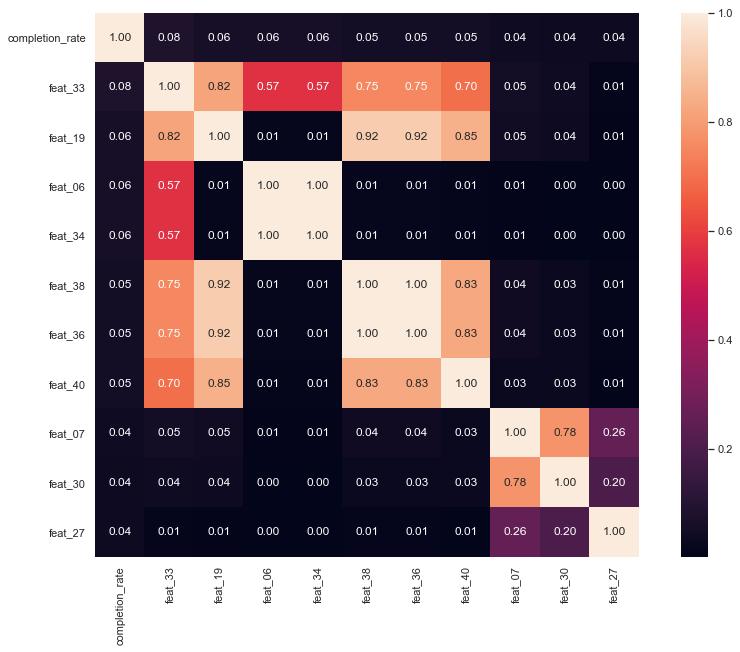

In [334]:
correlation_map = np.corrcoef(df_feats[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, 
                      cbar=True, 
                      annot=True, 
                      square=True, 
                      fmt='.2f', 
                      yticklabels=columns, 
                      xticklabels=columns)

plt.show()

## Normalize relevant features

In [335]:
from sklearn.preprocessing import MinMaxScaler

In [336]:
min_max_scaler = MinMaxScaler()

In [337]:
df_relevant = pd.DataFrame()
for column in columns:
    df_relevant[column] = min_max_scaler.fit_transform(np.array(df_feats[column].values).reshape(-1, 1))[:,0]

In [338]:
df_relevant.describe().T

,count,mean,std,min,25%,50%,75%,max
completion_rate,1031284.0,0.514903,0.223348,0.0,0.352388,0.530303,0.684746,1.0
feat_33,1031284.0,0.004712,0.016213,0.0,0.000000,0.000000,0.000000,1.0
feat_19,1031284.0,0.002850,0.013135,0.0,0.000000,0.000000,0.000000,1.0
feat_06,1031284.0,0.001843,0.009868,0.0,0.000000,0.000000,0.000000,1.0
feat_34,1031284.0,0.001843,0.009868,0.0,0.000000,0.000000,0.000000,1.0
feat_38,1031284.0,0.002285,0.012058,0.0,0.000000,0.000000,0.000000,1.0
feat_36,1031284.0,0.002285,0.012060,0.0,0.000000,0.000000,0.000000,1.0
feat_40,1031284.0,0.001948,0.011733,0.0,0.000000,0.000000,0.000000,1.0
feat_07,1031284.0,0.006866,0.015188,0.0,0.000000,0.000000,0.008065,1.0
feat_30,1031284.0,0.004138,0.012051,0.0,0.000000,0.000000,0.008065,1.0


## Baseline algorithm selection

In [339]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from pipeline.src.params import Params

In [340]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()), ('LR',LinearRegression())])))
pipelines.append(('ScaledLasso', Pipeline([('Scaler', MinMaxScaler()), ('Lasso', Lasso())])))
pipelines.append(('ScaledDTR', Pipeline([('Scaler', MinMaxScaler()), ('DTR', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()), ('GBM', GradientBoostingRegressor())])))

In [341]:
labels = df_relevant.pop('completion_rate')
X_train, _, y_train, _ = train_test_split(df_relevant, labels,
                                          test_size=Params.TEST_SIZE,
                                          random_state=Params.SEED)

In [342]:
scorer = make_scorer(getattr(import_module(Params.METRIC_ORIGIN), Params.METRIC_NAME))

In [343]:
results = []
names = []
print(f"Models result on {Params.METRIC_NAME} metric (mean/std):")
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=Params.CV, scoring=scorer)
    results.append(cv_results)
    names.append(name)
    print(f"-> {round(cv_results.mean(), 6)}/{round(cv_results.std(), 6)} ({name})")

Models result on mean_squared_error metric (mean/std):
-> 0.049425/0.000117 (ScaledLR)
-> 0.049901/0.000121 (ScaledLasso)
-> 0.048575/0.000112 (ScaledDTR)
-> 0.048021/0.000109 (ScaledGBM)


#### GradientBoostingRegressor shows better results on the baseline analysis.

## Pipeline model building

In [344]:
! sh scripts/init_pipeline.sh

Building runner
Step 1/8 : FROM dvcorg/cml-py3:latest
 ---> 06fcacb60db1
Step 2/8 : RUN apt-get update
 ---> Using cache
 ---> 9c340533b70e
Step 3/8 : RUN apt-get install git -y
 ---> Using cache
 ---> df17f805adcd
Step 4/8 : WORKDIR /home/runner
 ---> Using cache
 ---> 621f863c4aad
Step 5/8 : RUN pip install --upgrade pip
 ---> Using cache
 ---> d19db23d4f0f
Step 6/8 : COPY pipeline.requirements.txt ./
 ---> Using cache
 ---> 7a5a58c6691c
Step 7/8 : RUN pip install -r pipeline.requirements.txt
 ---> Using cache
 ---> 248bee07cf35
Step 8/8 : COPY . ./
 ---> 0a8016388b9d

Successfully built 0a8016388b9d
Successfully tagged runner:latest
Creating runner ... 
ting runner ... done
You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out

In [345]:
! sh scripts/run_pipeline.sh


Building runner
Step 1/8 : FROM dvcorg/cml-py3:latest
 ---> 06fcacb60db1
Step 2/8 : RUN apt-get update
 ---> Using cache
 ---> 9c340533b70e
Step 3/8 : RUN apt-get install git -y
 ---> Using cache
 ---> df17f805adcd
Step 4/8 : WORKDIR /home/runner
 ---> Using cache
 ---> 621f863c4aad
Step 5/8 : RUN pip install --upgrade pip
 ---> Using cache
 ---> d19db23d4f0f
Step 6/8 : COPY pipeline.requirements.txt ./
 ---> Using cache
 ---> 7a5a58c6691c
Step 7/8 : RUN pip install -r pipeline.requirements.txt
 ---> Using cache
 ---> 248bee07cf35
Step 8/8 : COPY . ./
 ---> a4acb8ec5a8d

Successfully built a4acb8ec5a8d
Successfully tagged runner:latest
Recreating runner ... 
eating runner ... doneRunning stage 'prepare_data' with command:
	python pipeline/src/prepare_data.py
Starting data prep stage...
Dataset loaded. Generating dependent feature and splitting into train and test sets...
Dataset features: 10
Train set: 825027 samples
Test set: 206257 samples
Dataset split. Generating validation stage 

## API Testing

In [346]:
import requests
import json

In [347]:
! sh scripts/run_API.sh

Building app
Step 1/7 : FROM python:3.7.4-slim-stretch
 ---> fad2b9f06d3b
Step 2/7 : RUN apt-get update
 ---> Using cache
 ---> c465af1d034d
Step 3/7 : RUN apt-get install -y git
 ---> Using cache
 ---> 0f0d9fac33de
Step 4/7 : WORKDIR /home/app
 ---> Using cache
 ---> 905b9b347e24
Step 5/7 : RUN pip install --upgrade pip
 ---> Using cache
 ---> f24a90cb524c
Step 6/7 : COPY API.requirements.txt ./
 ---> Using cache
 ---> 3395674add5a
Step 7/7 : RUN pip install -r API.requirements.txt
 ---> Using cache
 ---> b93d9993fe22

Successfully built b93d9993fe22
Successfully tagged app:latest
Creating app ... 
ting app ... done
API is up and listening in http://localhost:5000/
POST call /predict endpoint with json body format:
{
 "form_id": integer,
 "form_features": list of features in string format
}



In [349]:
endpoint_status='http://localhost:5000/status'
requests.get(endpoint_status)

<Response [200]>

### Model hot reloading

In [350]:
endpoint_predict='http://localhost:5000/predict'
payload = {
    "form_id": int(df_raw.iloc[Params.SEED]['form_id']), 
    "form_features": str(df_raw.iloc[Params.SEED][3:].tolist())
}

response = requests.post(endpoint_predict, json=payload)

In [351]:
response.text

'{"data": {"type": "predictor.form.completion_rate_predicted", "aggregate_id": "d93975cd-e7be-5e1e-bbe1-beb6cb5dc835", "data": {"form_id": 1123039, "rate_predicted": 0.4863165458406591}, "model_id": "eff7b6b0-4b75-4c20-a1ac-d4b590d724ed", "occurred_on": "2020-12-13 18:11:03"}}'

### API performance

In [352]:
dataset_path = "pipeline/data/completion_rate.csv"
dataset = pd.read_csv(dataset_path, low_memory=True)
performance_set = dataset.sample(n=Params.VALIDATION_SET_SIZE, random_state=Params.SEED)
performance_set.shape

(1500, 50)

In [353]:
time_start = time()
calls_processed = 0
for i, row in performance_set.iterrows():
    form_id = int(row['form_id'])
    form_features = str(row[3:].tolist())
    payload = {
        "form_id": form_id, 
        "form_features": form_features
    }
    response = requests.post(endpoint_predict, json=payload)
    if not response.ok:
        print(f"API failed for form_id: {form_id}")
        break
    else:
        calls_processed += 1
total_time = round(time()-time_start, 2)

print(f"Set total time to process {calls_processed} calls: {total_time} seconds")

Set total time to process 1500 calls: 13.53 seconds
